In [26]:
import os
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)
import numpy as np
import datetime
import matplotlib.pyplot as plt

cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

ca11_18 = pd.read_csv("./data/cali_2011_2018.csv", index_col = None)
ca11_18["Date"] = pd.to_datetime(ca11_18["Date"].astype(str), format = "%Y")
ca11_18["Date"] = [x.year for x in ca11_18["Date"]]

list(ca11_18.columns)
ca11_18.head(10)
ca11_18.shape

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


(9272, 255)

Text(0.5, 1.0, 'Proportion of Missing Values')

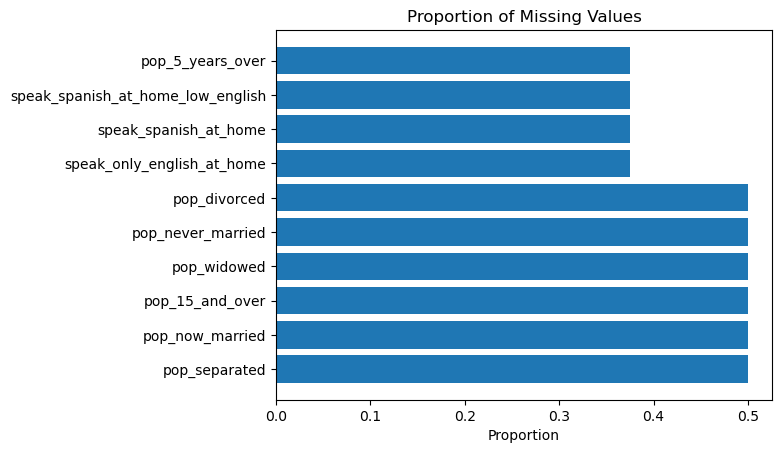

In [40]:
missingCols = ca11_18.isnull().any(axis = 0)
ca11_18.columns[missingCols]
caMiss = ca11_18.isna().mean().sort_values(ascending = False)[:10]
caMiss = caMiss[caMiss > 0].reset_index()
caMiss.columns = ["Var", "Proportion missing"]
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(caMiss["Var"], caMiss["Proportion missing"])
ax.set_xlabel("Proportion")
ax.set_title("Proportion of Missing Values")

In [83]:
ca11_18 = ca11_18.fillna(ca11_18.median())

In [90]:
list(ca11_18.columns)

['Date',
 'RegionName',
 'RegionID',
 'SizeRank',
 'aggregate_travel_time_to_work',
 'amerindian_including_hispanic',
 'amerindian_pop',
 'armed_forces',
 'asian_including_hispanic',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'associates_degree',
 'avg_rent',
 'bachelors_degree',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'black_including_hispanic',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_

<AxesSubplot:>

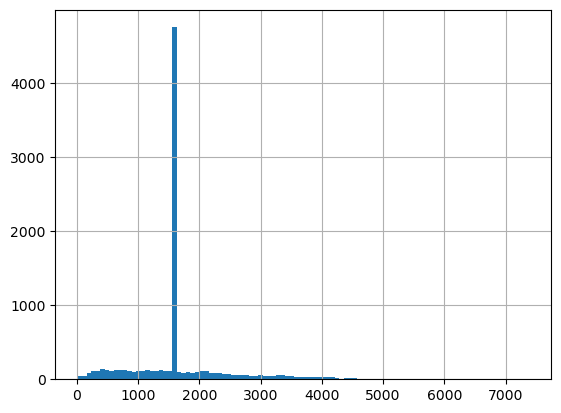

In [84]:
ca11_18["pop_divorced"].hist(bins = 100)

<AxesSubplot:>

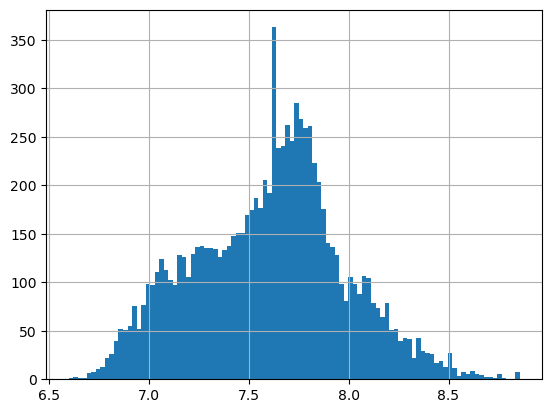

In [92]:
np.log(ca11_18["avg_rent"]).hist(bins = 100)

In [27]:
#fts = ca11_18.drop(["Date","RegionName", "RegionID", "avg_rent","median_rent"], axis = 1)                                        
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
X_train = pd.read_csv(path + "/data/features_train_ca.csv")
X_test  = pd.read_csv(path + "/data/features_test_ca.csv")
y_train = pd.read_csv(path + "/data/labels_train_ca.csv")
y_test  = pd.read_csv(path + "/data/labels_test_ca.csv")

fts = X_train.drop(["Date", "RegionID", "median_rent"], axis = 1)
target = y_train

In [29]:
X_train.shape

(8113, 229)

In [30]:
fts_std = StandardScaler().fit_transform(fts)
fts_std

array([[-0.53165013,  1.10088273, -0.64430708, ..., -1.31250162,
        -0.56065153,  0.76540088],
       [-0.39306803,  0.19969836, -0.6369278 , ..., -1.32578702,
        -0.58653438,  0.17343544],
       [-0.97569027,  1.28156846,  0.9569971 , ..., -1.27928811,
         0.23617068,  0.91842445],
       ...,
       [ 2.46056836,  0.        , -0.78451344, ..., -1.31560155,
        -1.32419578, -1.50114951],
       [ 0.21727063, -0.73999212,  0.13051752, ...,  0.89486797,
         0.52457965,  0.01251603],
       [ 0.50973661, -0.8213059 , -0.68858277, ...,  0.26569346,
         0.1973464 , -0.42386804]])

In [34]:
# check VIF 

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()
# vif_data["features"] = X_train

# #VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(fts.values, i)
#                    for i in range(len(fts_name))]


In [120]:
# print(vif_data.sort_values(by = "VIF"))

                        features       VIF
109  housing_built_2005_or_later  1.916053
193               other_race_pop  3.255943
91      female_female_households  3.644350
108   housing_built_2000_to_2004  3.885185
166         male_male_households  4.077946
..                           ...       ...
119         income_125000_149999       inf
120         income_150000_199999       inf
121           income_15000_19999       inf
123           income_20000_24999       inf
249          workers_16_and_over       inf

[250 rows x 2 columns]


In [35]:
### PCA 
#df2 = ca11_18.dropna()
X_train = X_train[['worked_at_home',
 'white_pop',
 'white_male_45_54',
 'walked_to_work',
 'vacant_housing_units_for_sale',
 'vacant_housing_units_for_rent',
 'vacant_housing_units',
 'two_parents_not_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_or_more_races_pop',
 'sales_office_employed',
 'renter_occupied_housing_units_paying_cash_median_gross_rent',
 'rent_under_10_percent',
 'rent_burden_not_computed',
 'rent_40_to_50_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'percent_income_spent_on_rent',
 'owner_occupied_housing_units_upper_value_quartile',
 'owner_occupied_housing_units_median_value',
 'owner_occupied_housing_units_lower_value_quartile',
 'other_race_pop',
 'occupation_services',
 'occupation_production_transportation_material',
 'not_hispanic_pop',
 'no_cars',
 'no_car',
 'mobile_homes',
 'million_dollar_housing_units',
 'median_year_structure_built',
 'median_age',
 'male_under_5',
 'male_male_households',
 'male_85_and_over',
 'male_80_to_84',
 'male_75_to_79',
 'male_67_to_69',
 'male_65_to_66',
 'male_55_to_59',
 'male_45_64_less_than_9_grade',
 'male_45_64_high_school',
 'male_45_64_graduate_degree',
 'male_45_64_grade_9_12',
 'male_45_64_bachelors_degree',
 'male_45_64_associates_degree',
 'male_40_to_44',
 'male_35_to_39',
 'male_30_to_34',
 'male_20',
 'male_18_to_19',
 'less_than_high_school_graduate',
 'income_per_capita',
 'income_less_10000',
 'income_75000_99999',
 'income_60000_74999',
 'income_50000_59999',
 'income_40000_44999',
 'income_35000_39999',
 'income_30000_34999',
 'income_25000_29999',
 'income_15000_19999',
 'income_125000_149999',
 'income_100000_124999',
 'in_undergrad_college',
 'in_grades_1_to_4',
 'housing_built_2005_or_later',
 'housing_built_2000_to_2004',
 'housing_built_1939_or_earlier',
 'households_public_asst_or_food_stamps',
 'hispanic_male_55_64',
 'hispanic_male_45_54',
 'high_school_diploma',
 'gini_index',
 'four_more_cars',
 'female_under_5',
 'female_female_households',
 'female_85_and_over',
 'female_80_to_84',
 'female_75_to_79',
 'female_70_to_74',
 'female_67_to_69',
 'female_65_to_66',
 'female_55_to_59',
 'female_50_to_54',
 'female_40_to_44',
 'female_35_to_39',
 'female_30_to_34',
 'female_25_to_29',
 'female_22_to_24',
 'female_21',
 'female_15_to_17',
 'father_one_parent_families_with_young_children',
 'employed_wholesale_trade',
 'employed_science_management_admin_waste',
 'employed_retail_trade',
 'employed_public_administration',
 'employed_other_services_not_public_admin',
 'employed_information',
 'employed_education_health_social',
 'employed_construction',
 'employed_arts_entertainment_recreation_accommodation_food',
 'employed_agriculture_forestry_fishing_hunting_mining',
 'dwellings_5_to_9_units',
 'dwellings_50_or_more_units',
 'dwellings_2_units',
 'dwellings_20_to_49_units',
 'dwellings_1_units_detached',
 'dwellings_1_units_attached',
 'dwellings_10_to_19_units',
 'different_house_year_ago_same_city',
 'different_house_year_ago_different_city',
 'commuters_by_subway_or_elevated',
 'commuters_by_bus',
 'commute_less_10_mins',
 'commute_45_59_mins',
 'commute_35_44_mins',
 'commute_20_24_mins',
 'commute_10_14_mins',
 'children_in_single_female_hh',
 'black_pop',
 'black_male_55_64',
 'black_male_45_54',
 'bachelors_degree_or_higher_25_64',
 'asian_pop',
 'asian_male_55_64',
 'armed_forces',
 'amerindian_pop',
 'aggregate_travel_time_to_work',
 'SizeRank']]
y = y_train

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = None)
pipeline = Pipeline(
    [("scaling", StandardScaler()),('pca', pca)]
)
pipeline.fit(X_train,y_train)


Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

In [9]:
pca_norm = pipeline.named_steps["pca"]
pca_norm.explained_variance_ratio_.shape

(131,)

In [11]:
len(X_train.columns)

131

In [ ]:
pca.

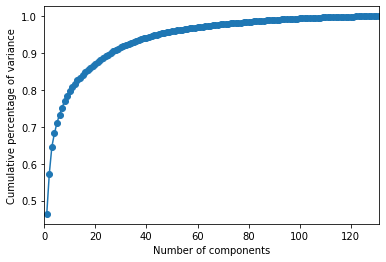

In [37]:
plt.scatter(range(1,len(X_train.columns)+1), np.cumsum(pca_norm.explained_variance_ratio_))
plt.plot(range(1,len(X_train.columns)+1), np.cumsum(pca_norm.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 131)
plt.show()

In [40]:
np.cumsum(pca_norm.explained_variance_ratio_)[0:11]

array([0.46399429, 0.57314529, 0.646221  , 0.68219005, 0.71091465,
       0.73346195, 0.75242704, 0.77026978, 0.78359213, 0.79619557])

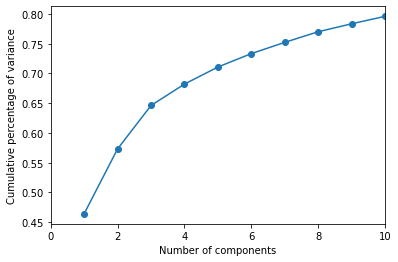

In [44]:
plt.scatter(range(1,11), np.cumsum(pca_norm.explained_variance_ratio_)[0:10])
plt.plot(range(1,11), np.cumsum(pca_norm.explained_variance_ratio_)[0:10])
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 10)
plt.show()

In [45]:
n_component = 10

pca = PCA(n_components = n_component)
scaler = StandardScaler()
scaler.fit(X_train)
X_normalized = scaler.transform(X_train)
fit_norm = pca.fit(X_normalized)
pcs = pd.DataFrame(fit_norm.components_)

In [46]:
X_new = pd.DataFrame(pca.transform(X_normalized))

In [49]:
X_all = pd.concat([X_train, X_new],axis = 1)
X_all.shape

(8113, 141)

In [50]:
corr0 = pd.DataFrame(X_all.corr().iloc[0:131,131:141].reset_index())
old_names = corr0.columns.to_list()

nums = list(range(10))
nums = [str(x) for x in nums]
new_names = ["pc" + x for x in nums]

col_dict = dict(zip(old_names, new_names))
col_dict['index'] = 'var'
corr0 = corr0.rename(columns = col_dict)

In [51]:
corr0

,var,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,9
0,worked_at_home,0.634716,0.575012,0.028992,-0.044998,-0.086641,-0.088517,0.009912,-0.150318,0.024590,-0.048580
1,white_pop,0.527764,0.526963,-0.304881,-0.427772,-0.122633,-0.128427,-0.065174,-0.096448,0.089899,-0.155502
2,white_male_45_54,0.510935,0.539575,-0.331898,-0.309407,-0.156915,-0.049356,-0.127657,-0.140333,0.088120,-0.152700
3,walked_to_work,0.393742,0.196896,0.583099,-0.099414,-0.076161,-0.200835,0.113450,0.225301,0.193640,0.196140
4,vacant_housing_units_for_sale,0.411212,-0.124626,-0.226172,-0.408901,-0.045868,0.126600,-0.005459,-0.261504,-0.077683,0.374684
5,vacant_housing_units_for_rent,0.604267,-0.060000,0.379940,-0.386170,-0.063840,0.006074,0.067936,-0.053660,-0.199303,0.076879
6,vacant_housing_units,0.267098,0.045893,0.148297,-0.472267,0.135284,0.009780,-0.042382,-0.191814,-0.057668,0.284984
7,two_parents_not_in_labor_force_families_with_y...,0.388712,-0.291242,-0.022318,-0.096862,-0.054735,-0.022941,0.074691,-0.185177,-0.005154,0.180949
8,two_parents_mother_in_labor_force_families_wit...,0.534800,-0.123127,-0.162047,-0.038897,-0.064137,0.017410,-0.047075,-0.060928,-0.041352,0.040012
9,two_parents_father_in_labor_force_families_wit...,0.795409,-0.171664,-0.201216,0.121796,-0.197995,-0.129114,-0.041608,-0.157588,-0.073360,0.090882


In [52]:
pc1_sorted = corr0.reindex(corr0.pc1.abs().sort_values(ascending = False).index)[['var','pc1']]

In [65]:
pc1_sorted.loc[abs(pc1_sorted["pc1"])>.90]

,var,pc1
11,sales_office_employed,0.948916
96,employed_retail_trade,0.946737
56,income_60000_74999,0.937931
88,female_30_to_34,0.936888
87,female_35_to_39,0.935133
57,income_50000_59999,0.930174
47,male_40_to_44,0.929487
86,female_40_to_44,0.925517
48,male_35_to_39,0.925352
89,female_25_to_29,0.918633


In [67]:
pc2_sorted = corr0.reindex(corr0.pc2.abs().sort_values(ascending = False).index)[['var','pc2']]
pc2_sorted.loc[abs(pc2_sorted["pc2"]) > .60]


,var,pc2
53,income_per_capita,0.780925
43,male_45_64_graduate_degree,0.778635
21,owner_occupied_housing_units_median_value,0.766159
20,owner_occupied_housing_units_upper_value_quartile,0.763383
124,bachelors_degree_or_higher_25_64,0.760238
22,owner_occupied_housing_units_lower_value_quartile,0.753202
45,male_45_64_bachelors_degree,0.694579
12,renter_occupied_housing_units_paying_cash_medi...,0.659121
30,million_dollar_housing_units,0.631565


In [57]:
pc3_sorted = corr0.reindex(corr0.pc3.abs().sort_values(ascending = False).index)[['var','pc3']]
pc3_sorted.loc[abs(pc3_sorted["pc3"]) > .50]

,var,pc3
27,no_cars,0.692706
28,no_car,0.680071
114,commuters_by_bus,0.632146
107,dwellings_20_to_49_units,0.620143
69,housing_built_1939_or_earlier,0.607791
3,walked_to_work,0.583099
110,dwellings_10_to_19_units,0.579549
13,rent_under_10_percent,0.570652
31,median_year_structure_built,-0.528710
18,rent_10_to_15_percent,0.519220
